# Lake model continued - subspace partitioning

In the previous week you used the lake problem as a means of getting acquainted with the workbench. In this assignment we will continue with the lake problem, focussing explicitly on using it for open exploration. You can use the second part of the [open exploration tutorial](https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html) for help.

**It is paramount that you are using the lake problem with 100 decision variables, rather than the one found on the website with the seperate anthropogenic release decision**

## 1. Apply scenario discovery

1. Instanciate the model and define its parameters. Use the same parameters as in Assignment 2.
2. Generate 10 policies and 1000 scenarios and evaluate them.
3. The experiments array contains the values for each of the 100 decision levers. This might easily mess up the analysis. Remove these columns from the experiment array. *hint: use `experiments.drop_columns`*
4. Apply scenario discovery, focussing on the 10 percent of worst outcomes for reliability

In [1]:
from lakemodel_function import lake_problem
from ema_workbench import RealParameter, ScalarOutcome, Constant, Model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\nelen\EPA141A\venv\Lib\site-packages\ema_workbench\em_framework\__init__.py:101: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")


In [2]:

# Instantiate the model
model = Model("lakeproblem", function = lake_problem)

# Specify uncertainties
model.uncertainties = [
    RealParameter("b", 0.1, 0.45),
    RealParameter("q", 2.0, 4.5),
    RealParameter("mean", 0.01, 0.05),
    RealParameter("stdev", 0.001, 0.005),
    RealParameter("delta", 0.93, 0.99),
]

# Set levers, one for each time step
model.levers = [
RealParameter(f"l{str(i)}", 0.0, 0.01) for i in range(0,100)
]

# Specify outcomes
model.outcomes = [
    ScalarOutcome("max_P"),
    ScalarOutcome("utility"),
    ScalarOutcome("inertia"),
    ScalarOutcome("reliability"),
]

In [3]:
from ema_workbench import MultiprocessingEvaluator
with MultiprocessingEvaluator(model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=1000, policies=10)

100%|███████████████████████████████████| 10000/10000 [00:22<00:00, 452.45it/s]


In [4]:
experiments

,b,delta,mean,q,stdev,l0,l1,l10,l11,l12,...,l93,l94,l95,l96,l97,l98,l99,scenario,policy,model
0,0.300209,0.964803,0.013949,3.758186,0.004945,0.006110,0.004676,0.003941,0.006254,0.008016,...,0.009845,0.001064,0.001309,0.008795,0.003537,0.000735,0.001127,10,0,lakeproblem
1,0.428880,0.935688,0.037277,2.813117,0.001284,0.006110,0.004676,0.003941,0.006254,0.008016,...,0.009845,0.001064,0.001309,0.008795,0.003537,0.000735,0.001127,11,0,lakeproblem
2,0.321790,0.978321,0.037871,3.117400,0.002009,0.006110,0.004676,0.003941,0.006254,0.008016,...,0.009845,0.001064,0.001309,0.008795,0.003537,0.000735,0.001127,12,0,lakeproblem
3,0.400220,0.989859,0.020028,4.466779,0.004491,0.006110,0.004676,0.003941,0.006254,0.008016,...,0.009845,0.001064,0.001309,0.008795,0.003537,0.000735,0.001127,13,0,lakeproblem
4,0.413554,0.981561,0.011522,3.732143,0.001996,0.006110,0.004676,0.003941,0.006254,0.008016,...,0.009845,0.001064,0.001309,0.008795,0.003537,0.000735,0.001127,14,0,lakeproblem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.219032,0.949056,0.044556,2.738098,0.002722,0.004441,0.001823,0.009567,0.009719,0.004497,...,0.007369,0.002367,0.008748,0.001241,0.002909,0.006846,0.005780,1005,9,lakeproblem
9996,0.373839,0.988909,0.020957,2.848706,0.001646,0.004441,0.001823,0.009567,0.009719,0.004497,...,0.007369,0.002367,0.008748,0.001241,0.002909,0.006846,0.005780,1006,9,lakeproblem
9997,0.115538,0.973322,0.049257,2.690740,0.003877,0.004441,0.001823,0.009567,0.009719,0.004497,...,0.007369,0.002367,0.008748,0.001241,0.002909,0.006846,0.005780,1007,9,lakeproblem
9998,0.135285,0.968817,0.041716,2.393483,0.001434,0.004441,0.001823,0.009567,0.009719,0.004497,...,0.007369,0.002367,0.008748,0.001241,0.002909,0.006846,0.005780,1008,9,lakeproblem


In [5]:
print(experiments.columns)

Index(['b', 'delta', 'mean', 'q', 'stdev', 'l0', 'l1', 'l10', 'l11', 'l12',
       ...
       'l93', 'l94', 'l95', 'l96', 'l97', 'l98', 'l99', 'scenario', 'policy',
       'model'],
      dtype='object', length=108)


In [7]:
decision_levers = [f"l{str(i)}"for i in range(0,100)]

In [8]:
experiments.drop(columns=decision_levers, inplace = True)
experiments

,b,delta,mean,q,stdev,scenario,policy,model
0,0.300209,0.964803,0.013949,3.758186,0.004945,10,0,lakeproblem
1,0.428880,0.935688,0.037277,2.813117,0.001284,11,0,lakeproblem
2,0.321790,0.978321,0.037871,3.117400,0.002009,12,0,lakeproblem
3,0.400220,0.989859,0.020028,4.466779,0.004491,13,0,lakeproblem
4,0.413554,0.981561,0.011522,3.732143,0.001996,14,0,lakeproblem
...,...,...,...,...,...,...,...,...
9995,0.219032,0.949056,0.044556,2.738098,0.002722,1005,9,lakeproblem
9996,0.373839,0.988909,0.020957,2.848706,0.001646,1006,9,lakeproblem
9997,0.115538,0.973322,0.049257,2.690740,0.003877,1007,9,lakeproblem
9998,0.135285,0.968817,0.041716,2.393483,0.001434,1008,9,lakeproblem


In [9]:
outcomes

{'max_P': array([0.07066266, 0.11010329, 0.14810227, ..., 9.11088442, 7.68881619,
        0.07800589]),
 'utility': array([0.05833671, 0.0338631 , 0.08426941, ..., 0.06528035, 0.05715281,
        0.02828749]),
 'inertia': array([0., 0., 0., ..., 0., 0., 0.]),
 'reliability': array([1.    , 1.    , 1.    , ..., 0.0695, 0.07  , 1.    ])}

In [10]:
from ema_workbench.analysis import prim
import numpy as np

x = experiments
y = outcomes["reliability"] < np.percentile(outcomes["reliability"], 10)
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

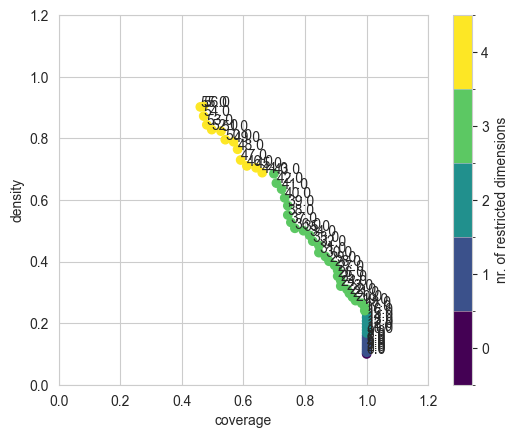

In [11]:
box1.show_tradeoff(annotated=True)
plt.show()

coverage       0.699000
density        0.685294
id            43.000000
k            699.000000
mass           0.102000
mean           0.685294
n           1020.000000
res_dim        3.000000
Name: 43, dtype: float64

        box 43                                       
           min       max      qp value       qp value
b     0.100043  0.208276           NaN  5.201070e-169
q     2.001233  3.096962           NaN  1.467079e-102
mean  0.021621  0.049984  3.756652e-10            NaN



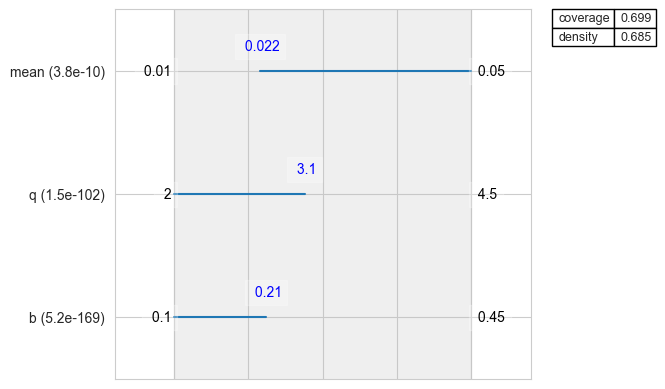

In [14]:
point=43
box1.inspect(point)
box1.inspect(point, style="graph")
plt.show()

In [15]:
box1.resample(point)

,reproduce coverage,reproduce density
b,100.0,100.0
mean,100.0,100.0
q,100.0,100.0
stdev,40.0,30.0
delta,10.0,10.0
policy,0.0,10.0


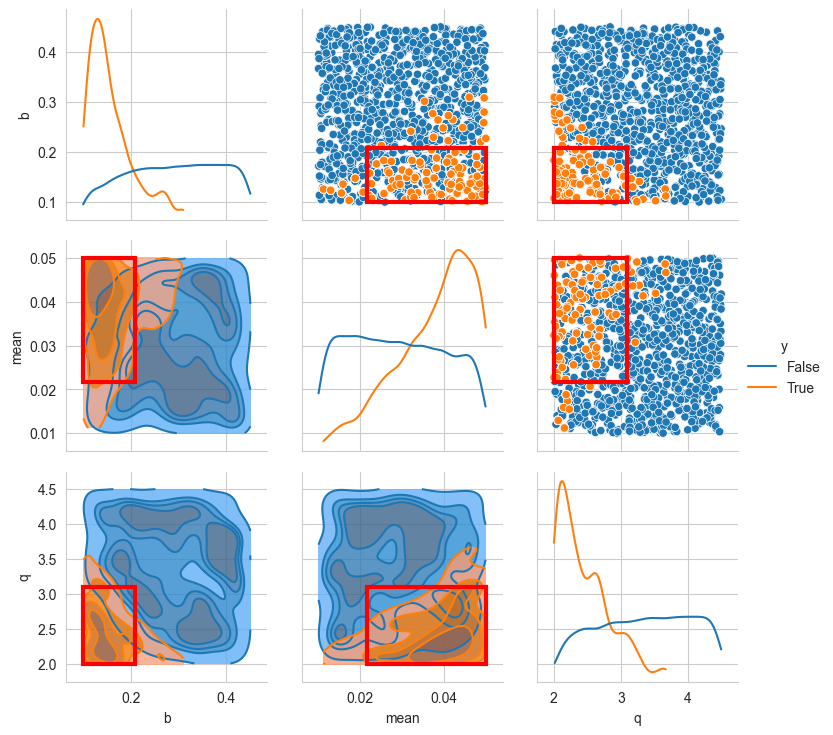

In [16]:
box1.show_pairs_scatter(point)
plt.show()

## 2. Visualize the results using Dimensional Stacking
Take the classification of outcomes as used in step 3 of scenario discovery, and instead visualize the results using dimensional stacking. How do these results compare to the insights from scenario discovery?

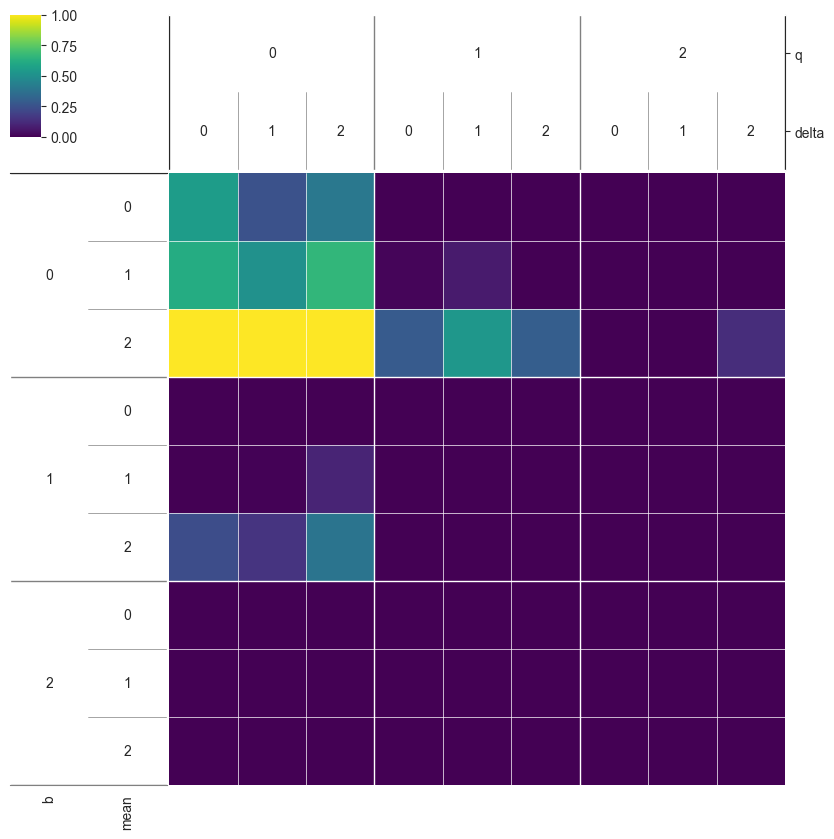

In [17]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(x,y,2,nbins=3)
plt.show()

C:\Users\nelen\EPA141A\venv\Lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:408: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(x_y_concat, values=ooi_label, index=rows, columns=columns, dropna=False)


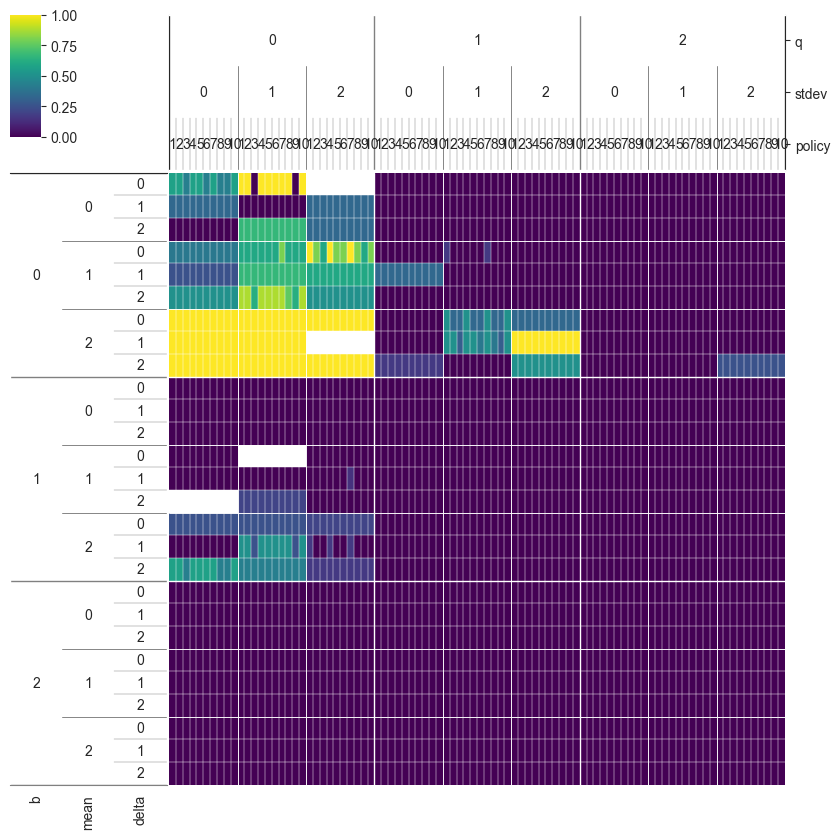

In [18]:
dimensional_stacking.create_pivot_plot(x,y,3,nbins=3)
plt.show()